In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [4]:
df.shape

(25000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [97]:
df.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salried,2,125 to 150,0.443029,28.0,1,0,...,Unknown,2004.0,Chennai,67.0,N,Rare,Moderate,1,25.0,0.283019
1,0,0,0,Student,4,150 to 175,0.768429,50.0,0,0,...,formerly smoked,2004.0,Jaipur,58.0,N,Rare,Moderate,3,27.0,0.056604
2,1,0,0,Business,4,200 to 225,0.367839,68.0,0,0,...,formerly smoked,2004.0,Jaipur,73.0,N,Daily,Extreme,0,32.0,0.396226
3,7,4,0,Business,2,175 to 200,0.726938,51.0,0,0,...,Unknown,2004.0,Chennai,71.0,Y,Rare,No,3,37.0,0.377358
4,3,1,0,Student,2,150 to 175,0.458193,44.0,0,1,...,never smoked,2004.0,Bangalore,74.0,N,No,Extreme,0,34.0,0.415094


In [78]:
df.describe(include="all")

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000,25000.000000,25000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000,25000.0,25000,25000.000000,25000,25000,25000,25000.000000,25000.000000,25000.000000
unique,NaN,NaN,NaN,3,NaN,5,NaN,NaN,NaN,NaN,...,4,29.0,15,NaN,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,Student,NaN,150 to 175,NaN,NaN,NaN,NaN,...,never smoked,2004.0,Bangalore,NaN,N,Rare,Moderate,NaN,NaN,NaN
freq,NaN,NaN,NaN,10169,NaN,8763,NaN,NaN,NaN,NaN,...,9249,12362.0,1742,NaN,17418,13752,14638,NaN,NaN,NaN
mean,4.089040,0.773680,0.081720,NaN,3.104200,NaN,0.511062,44.918320,0.054640,0.098160,...,NaN,NaN,NaN,71.610480,NaN,NaN,NaN,2.517960,28.812280,0.377349
std,2.606612,1.199449,0.273943,NaN,1.141663,NaN,0.204211,16.107492,0.227281,0.297537,...,NaN,NaN,NaN,9.325183,NaN,NaN,NaN,1.690335,8.632382,0.219010
min,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,16.000000,0.000000,0.000000,...,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,0.000000,11.000000,0.000000
25%,2.000000,0.000000,0.000000,NaN,2.000000,NaN,0.375000,31.000000,0.000000,0.000000,...,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,1.000000,21.000000,0.207547
50%,4.000000,0.000000,0.000000,NaN,3.000000,NaN,0.489996,45.000000,0.000000,0.000000,...,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,3.000000,31.000000,0.377358
75%,6.000000,1.000000,0.000000,NaN,4.000000,NaN,0.625000,59.000000,0.000000,0.000000,...,NaN,NaN,NaN,78.000000,NaN,NaN,NaN,4.000000,36.000000,0.528302


In [6]:
df.describe(include="all")["insurance_cost"]

count     25000.000000
unique             NaN
top                NaN
freq               NaN
mean      27147.407680
std       14323.691832
min        2468.000000
25%       16042.000000
50%       27148.000000
75%       37020.000000
max       67870.000000
Name: insurance_cost, dtype: float64

In [7]:
df.insurance_cost.unique()

array([20978,  6170, 28382, 27148, 29616, 39488, 37020, 22212,  8638,
       25914, 17276, 14808, 46892, 33318, 49360, 18510, 32084, 12340,
        3702,  9872, 55530,  4936, 51828, 23446,  7404, 57998, 38254,
       24680, 60466, 54296, 34552, 16042, 30850, 41956, 13574, 43190,
       48126, 19744, 56764, 35786, 11106, 61700, 44424, 40722, 59232,
       53062, 64168, 62934, 45658, 50594, 65402, 66636, 67870,  2468],
      dtype=int64)

In [8]:
df["insurance_cost"].value_counts().sort_index()

2468       12
3702      309
4936      197
6170      970
7404     1214
8638      954
9872      742
11106     431
12340     373
13574     454
14808     569
16042     578
17276     644
18510     615
19744     637
20978     717
22212     658
23446     634
24680     669
25914     779
27148     719
28382     845
29616     766
30850     743
32084     677
33318     733
34552     857
35786     827
37020     869
38254     977
39488     727
40722     474
41956     389
43190     265
44424     253
45658     233
46892     254
48126     259
49360     239
50594     199
51828     177
53062     192
54296     172
55530     152
56764     122
57998     113
59232     140
60466     137
61700      70
62934      87
64168      77
65402      56
66636      27
67870      17
Name: insurance_cost, dtype: int64

In [9]:
#Let's look at the distribution of insurance cost at different percentiles
print("0.5% properties have a insurance cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 0.5)))
print("  1% properties have a insurance cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 1)))
print("  5% properties have a insurance cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 5)))
print(" 10% properties have a insurance cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 10)))
print(" 90% properties have a insurance cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 90)))
print(" 95% properties have a insurance cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 95)))
print(" 99% properties have a insurance cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 99)))
print("99.5% properties have a insurance cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 99.5)))

0.5% properties have a insurance cost lower than  3702.00
  1% properties have a insurance cost lower than  3702.00
  5% properties have a insurance cost lower than  6170.00
 10% properties have a insurance cost lower than  7404.00
 90% properties have a insurance cost lower than  45658.00
 95% properties have a insurance cost lower than  53062.00
 99% properties have a insurance cost lower than  62934.00
99.5% properties have a insurance cost lower than  64168.00


In [10]:
df.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [11]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()  

applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [12]:
df.duplicated().any()

False

In [13]:
df.isnull().sum()

applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [14]:
df.drop('applicant_id',axis=1,inplace=True)

In [15]:
df['Year_last_admitted'] = df.Year_last_admitted.astype('object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

## Numerical variables

In [17]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,2,4866,28,1,0,97,31.2,67,1,25,20978
1,0,0,0,4,6411,50,0,0,212,34.2,58,3,27,6170
2,1,0,0,4,4509,68,0,0,166,40.4,73,0,32,28382
3,7,4,0,2,6214,51,0,0,109,22.9,71,3,37,27148
4,3,1,0,2,4938,44,0,1,118,26.5,74,0,34,29616


### Discrete Variables

In [18]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['applicant_id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print()
print(discrete_feature)
print()
# visualise the discrete variables
df[discrete_feature].head()

Discrete Variables Count: 7

['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 'visited_doctor_last_1_year', 'heart_decs_history', 'other_major_decs_history', 'weight_change_in_last_one_year']



,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,heart_decs_history,other_major_decs_history,weight_change_in_last_one_year
0,3,1,1,2,1,0,1
1,0,0,0,4,0,0,3
2,1,0,0,4,0,0,0
3,7,4,0,2,0,0,3
4,3,1,0,2,0,1,0


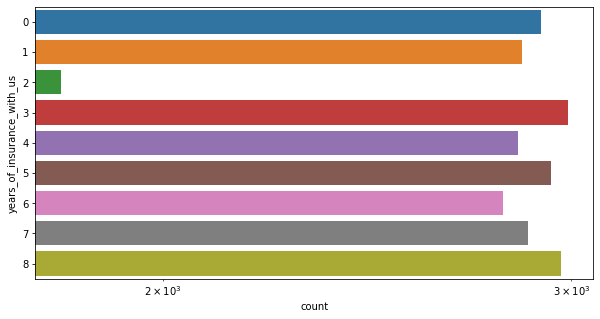

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['years_of_insurance_with_us'])
plt.xscale('log')

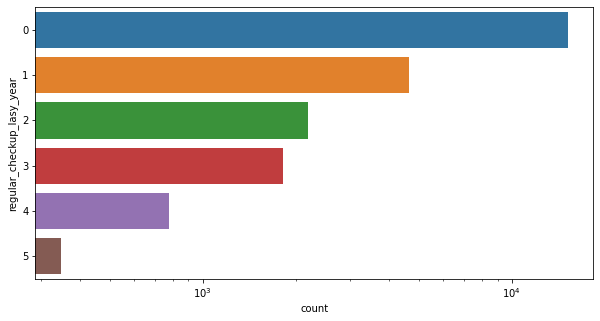

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['regular_checkup_lasy_year'])
plt.xscale('log')

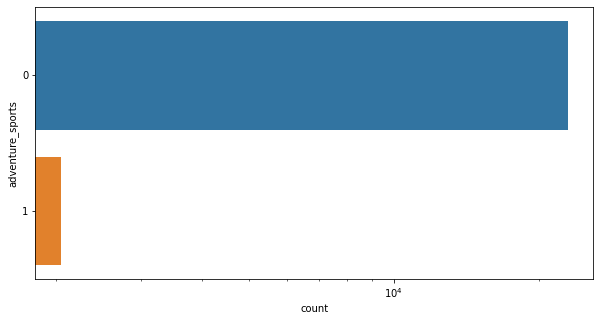

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['adventure_sports'])
plt.xscale('log')

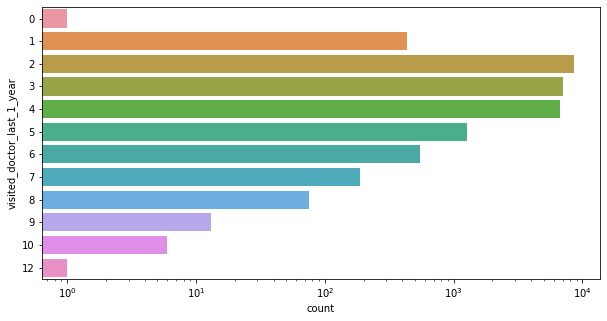

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['visited_doctor_last_1_year'])
plt.xscale('log')

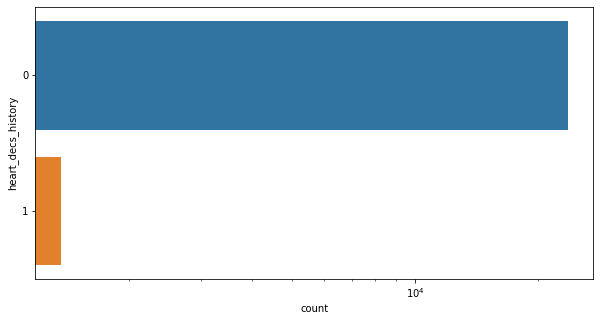

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['heart_decs_history'])
plt.xscale('log')

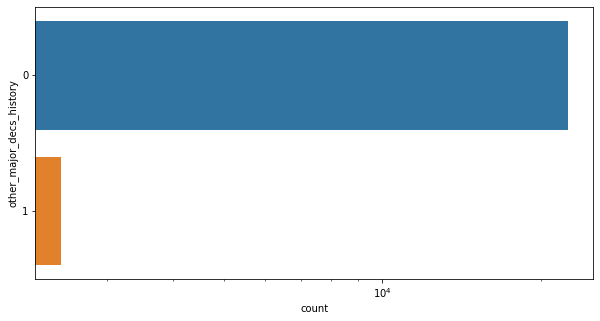

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['other_major_decs_history'])
plt.xscale('log')

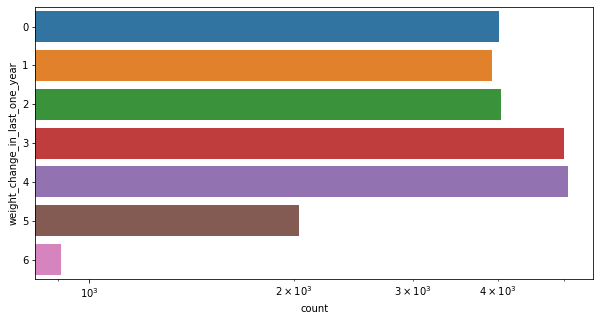

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['weight_change_in_last_one_year'])
plt.xscale('log')

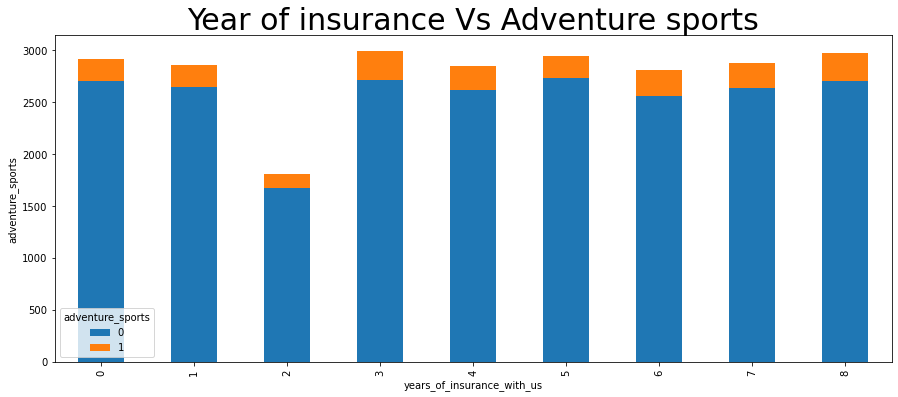

In [19]:
ct=pd.crosstab(df['years_of_insurance_with_us'],df['adventure_sports'],margins=True)
ct.drop('All',inplace=True)
ct.drop('All',axis=1,inplace=True)
ct.plot.bar(stacked=True, figsize=(15,6))
plt.xlabel('years_of_insurance_with_us') 
plt.ylabel('adventure_sports') 
plt.title("Year of insurance Vs Adventure sports",fontsize=30)
plt.show()

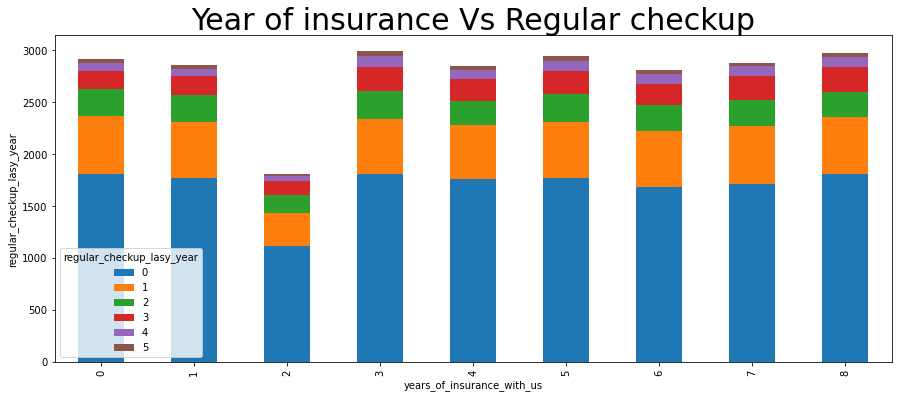

In [20]:
ct=pd.crosstab(df['years_of_insurance_with_us'],df['regular_checkup_lasy_year'],margins=True)
ct.drop('All',inplace=True)
ct.drop('All',axis=1,inplace=True)
ct.plot.bar(stacked=True, figsize=(15,6))
plt.xlabel('years_of_insurance_with_us') 
plt.ylabel('regular_checkup_lasy_year') 
plt.title("Year of insurance Vs Regular checkup",fontsize=30)
plt.show()

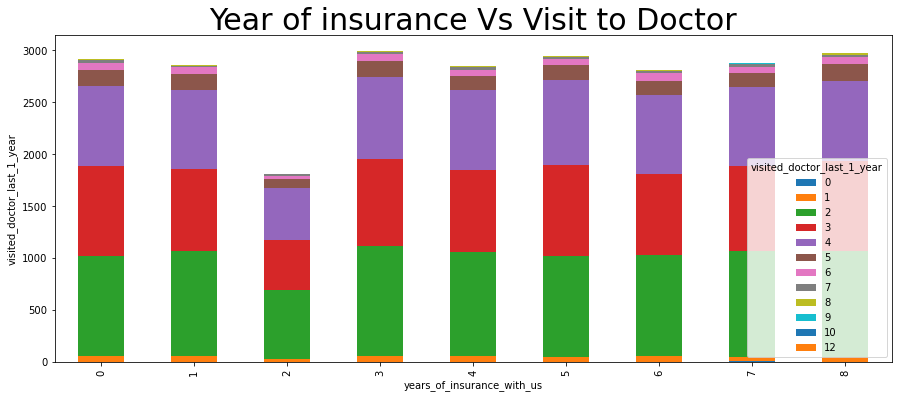

In [21]:
ct=pd.crosstab(df['years_of_insurance_with_us'],df['visited_doctor_last_1_year'],margins=True)
ct.drop('All',inplace=True)
ct.drop('All',axis=1,inplace=True)
ct.plot.bar(stacked=True, figsize=(15,6))
plt.xlabel('years_of_insurance_with_us') 
plt.ylabel('visited_doctor_last_1_year') 
plt.title("Year of insurance Vs Visit to Doctor",fontsize=30)
plt.show()

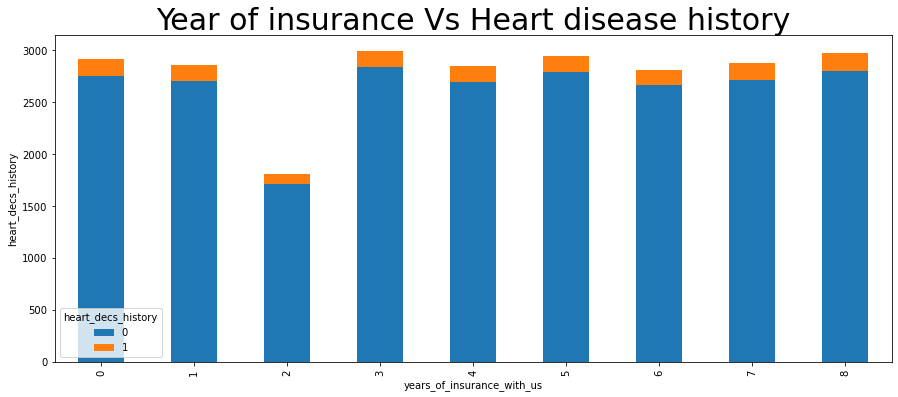

In [22]:
ct=pd.crosstab(df['years_of_insurance_with_us'],df['heart_decs_history'],margins=True)
ct.drop('All',inplace=True)
ct.drop('All',axis=1,inplace=True)
ct.plot.bar(stacked=True, figsize=(15,6))
plt.xlabel('years_of_insurance_with_us') 
plt.ylabel('heart_decs_history') 
plt.title("Year of insurance Vs Heart disease history",fontsize=30)
plt.show()

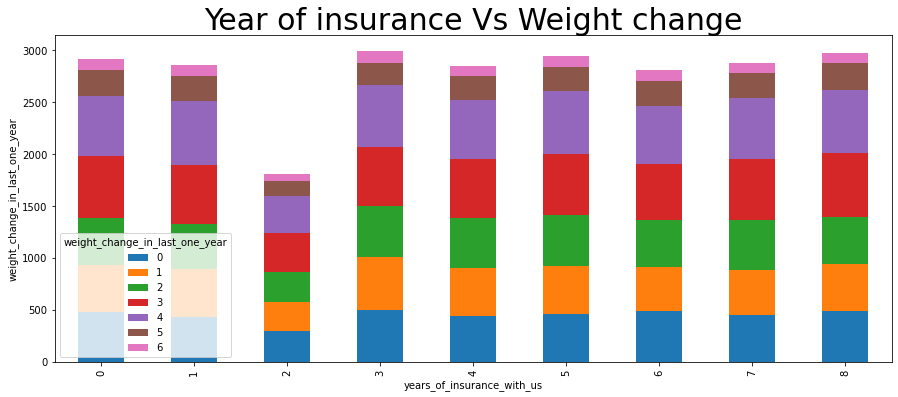

In [23]:
ct=pd.crosstab(df['years_of_insurance_with_us'],df['weight_change_in_last_one_year'],margins=True)
ct.drop('All',inplace=True)
ct.drop('All',axis=1,inplace=True)
ct.plot.bar(stacked=True, figsize=(15,6))
plt.xlabel('years_of_insurance_with_us') 
plt.ylabel('weight_change_in_last_one_year') 
plt.title("Year of insurance Vs Weight change",fontsize=30)
plt.show()

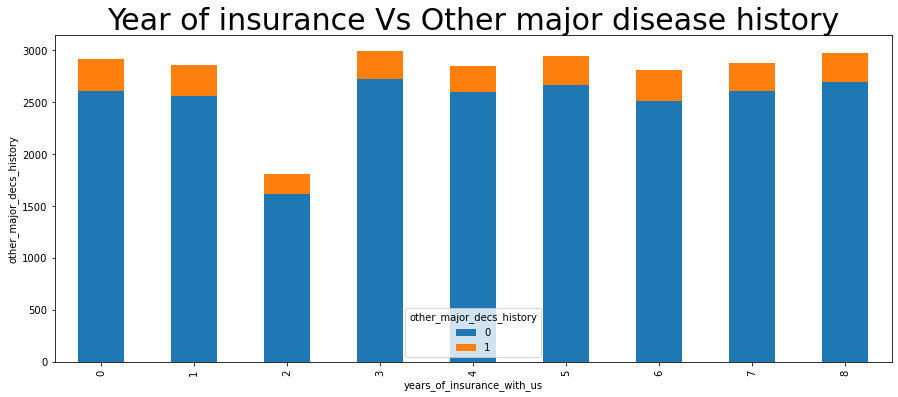

In [24]:
ct=pd.crosstab(df['years_of_insurance_with_us'],df['other_major_decs_history'],margins=True)
ct.drop('All',inplace=True)
ct.drop('All',axis=1,inplace=True)
ct.plot.bar(stacked=True, figsize=(15,6))
plt.xlabel('years_of_insurance_with_us') 
plt.ylabel('other_major_decs_history') 
plt.title("Year of insurance Vs Other major disease history",fontsize=30)
plt.show()

### Continuous variables

In [25]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['applicant_id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
print()
print(continuous_feature)
print()
# visualise the continuous variables
df[continuous_feature].head()

Continuous feature Count 7

['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']



,daily_avg_steps,age,avg_glucose_level,bmi,weight,fat_percentage,insurance_cost
0,4866,28,97,31.2,67,25,20978
1,6411,50,212,34.2,58,27,6170
2,4509,68,166,40.4,73,32,28382
3,6214,51,109,22.9,71,37,27148
4,4938,44,118,26.5,74,34,29616


### Distribution of continuous varibales

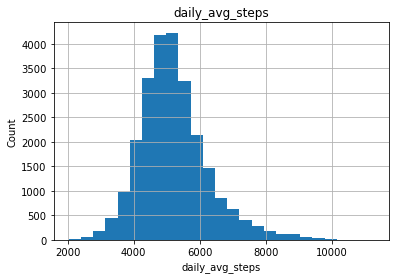

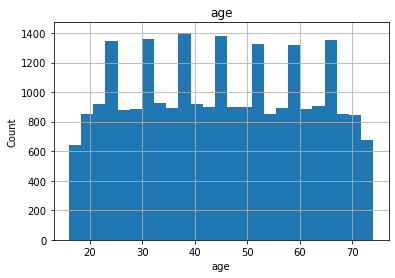

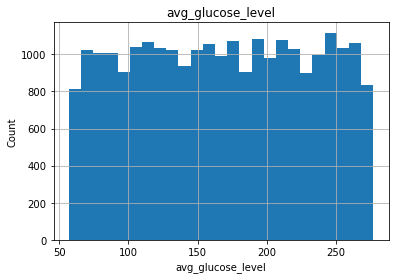

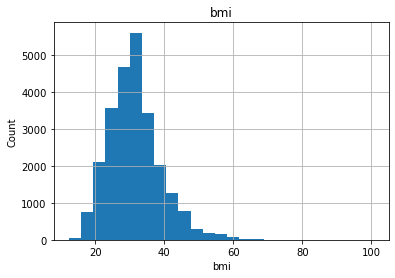

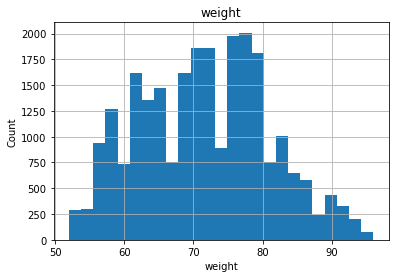

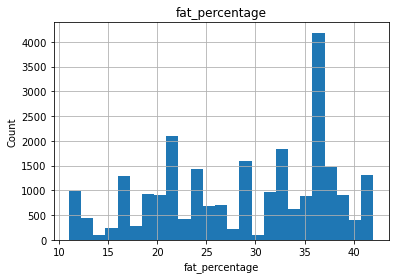

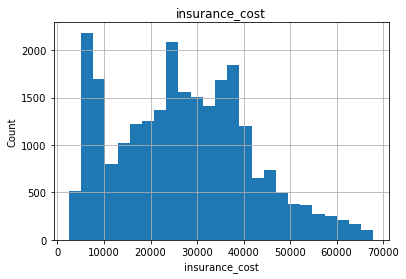

In [26]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Scatter plot of continuous variables

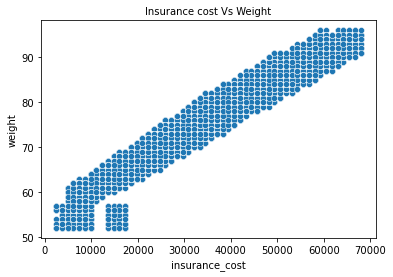

In [27]:
sns.scatterplot(x="insurance_cost",y="weight", data=df,marker='o')
plt.xlabel('insurance_cost') 
plt.ylabel('weight') 
plt.title("Insurance cost Vs Weight",fontsize=10)
plt.show()

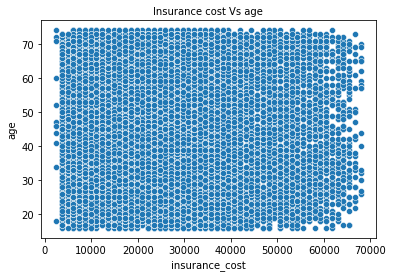

In [28]:
sns.scatterplot(x="insurance_cost",y="age", data=df,marker='o')
plt.xlabel('insurance_cost') 
plt.ylabel('age') 
plt.title("Insurance cost Vs age",fontsize=10)
plt.show()

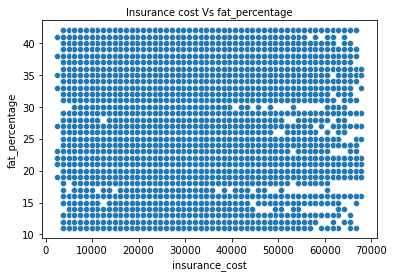

In [29]:
sns.scatterplot(x="insurance_cost",y="fat_percentage", data=df,marker='o')
plt.xlabel('insurance_cost') 
plt.ylabel('fat_percentage') 
plt.title("Insurance cost Vs fat_percentage",fontsize=10)
plt.show()

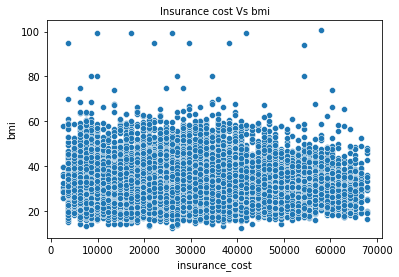

In [30]:
sns.scatterplot(x="insurance_cost",y="bmi", data=df,marker='o')
plt.xlabel('insurance_cost') 
plt.ylabel('bmi') 
plt.title("Insurance cost Vs bmi",fontsize=10)
plt.show()

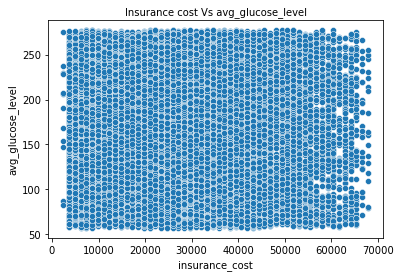

In [31]:
sns.scatterplot(x="insurance_cost",y="avg_glucose_level", data=df,marker='o')
plt.xlabel('insurance_cost') 
plt.ylabel('avg_glucose_level') 
plt.title("Insurance cost Vs avg_glucose_level",fontsize=10)
plt.show()

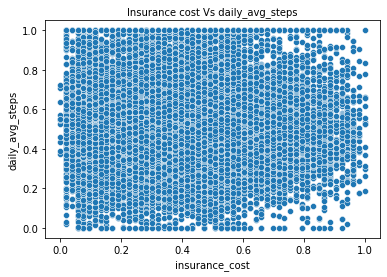

In [47]:
sns.scatterplot(x="insurance_cost",y="daily_avg_steps", data=df,marker='o')
plt.xlabel('insurance_cost') 
plt.ylabel('daily_avg_steps') 
plt.title("Insurance cost Vs daily_avg_steps",fontsize=10)
plt.show()

## Categorical variable

In [51]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print("Categorical Variables Count: {}".format(len(categorical_features)))
print()
print(categorical_features)
print()
df[categorical_features].head()

Categorical Variables Count: 9

['Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Year_last_admitted', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']



,Occupation,cholesterol_level,Gender,smoking_status,Year_last_admitted,Location,covered_by_any_other_company,Alcohol,exercise
0,Salried,125 to 150,Male,Unknown,2004.0,Chennai,N,Rare,Moderate
1,Student,150 to 175,Male,formerly smoked,2004.0,Jaipur,N,Rare,Moderate
2,Business,200 to 225,Female,formerly smoked,2004.0,Jaipur,N,Daily,Extreme
3,Business,175 to 200,Female,Unknown,2004.0,Chennai,Y,Rare,No
4,Student,150 to 175,Male,never smoked,2004.0,Bangalore,N,No,Extreme


In [52]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Occupation and number of categories are 3
The feature is cholesterol_level and number of categories are 5
The feature is Gender and number of categories are 2
The feature is smoking_status and number of categories are 4
The feature is Year_last_admitted and number of categories are 29
The feature is Location and number of categories are 15
The feature is covered_by_any_other_company and number of categories are 2
The feature is Alcohol and number of categories are 3
The feature is exercise and number of categories are 3


<AxesSubplot:xlabel='Occupation', ylabel='Count'>

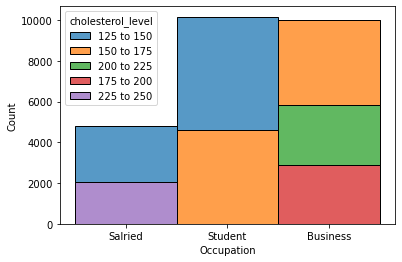

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="Occupation", hue="cholesterol_level", data=df, stat="count", multiple="stack")

<AxesSubplot:xlabel='Gender', ylabel='Count'>

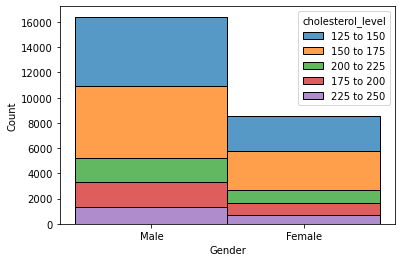

In [54]:
sns.histplot(binwidth=0.5, x="Gender", hue="cholesterol_level", data=df, stat="count", multiple="stack")

<AxesSubplot:xlabel='exercise', ylabel='Count'>

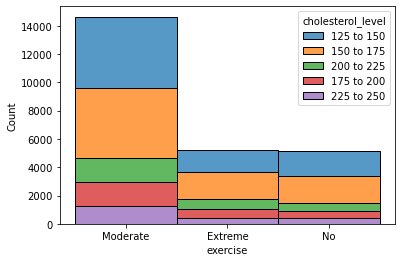

In [55]:
sns.histplot(binwidth=0.5, x="exercise", hue="cholesterol_level", data=df, stat="count", multiple="stack")

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

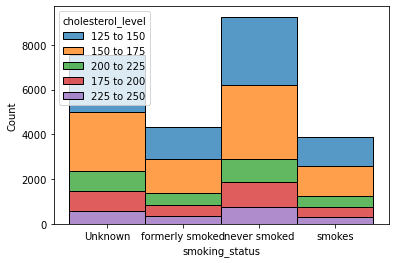

In [56]:
sns.histplot(binwidth=0.5, x="smoking_status", hue="cholesterol_level", data=df, stat="count", multiple="stack")

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

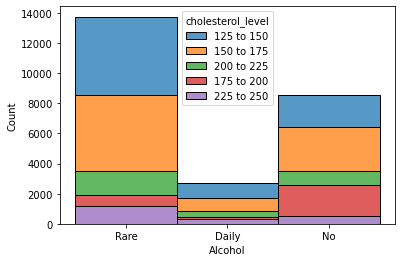

In [65]:
sns.histplot(binwidth=1,
            hue="cholesterol_level",
            x="Alcohol",
            data=df,
            stat="count",
            multiple="stack")

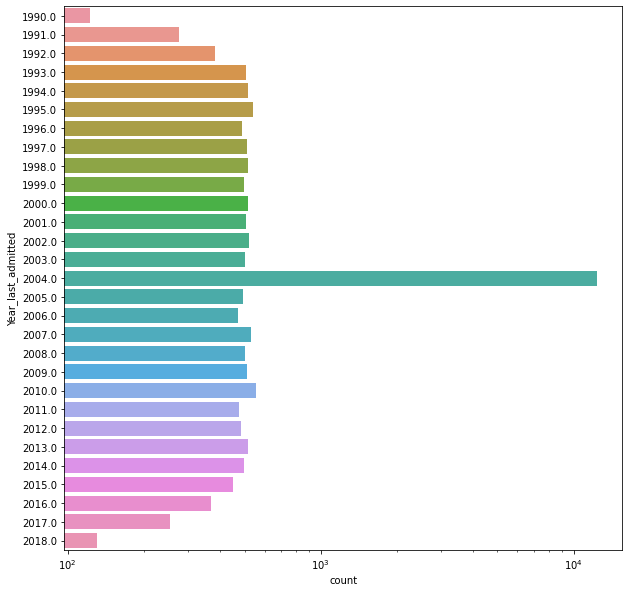

In [72]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Year_last_admitted'])
plt.xscale('log')

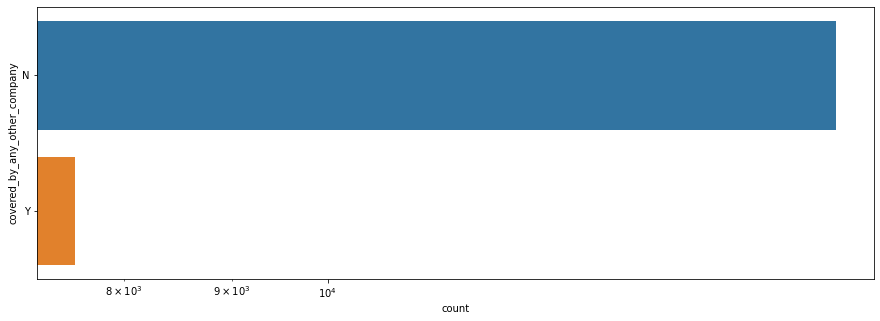

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['covered_by_any_other_company'])
plt.xscale('log')

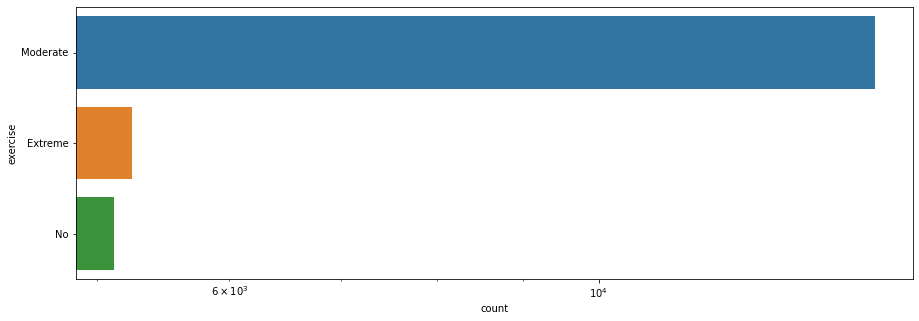

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['exercise'])
plt.xscale('log')

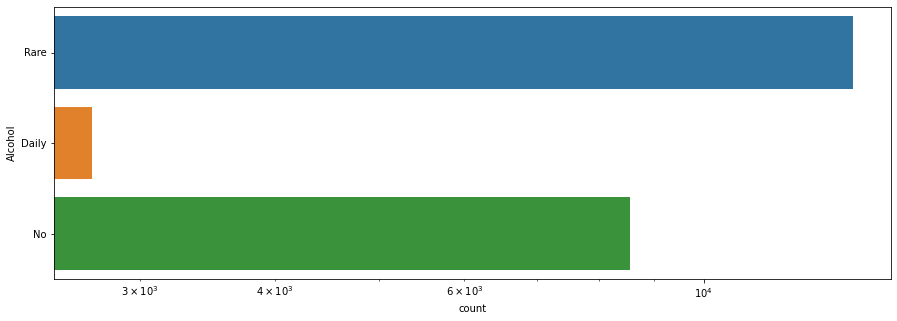

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Alcohol'])
plt.xscale('log')

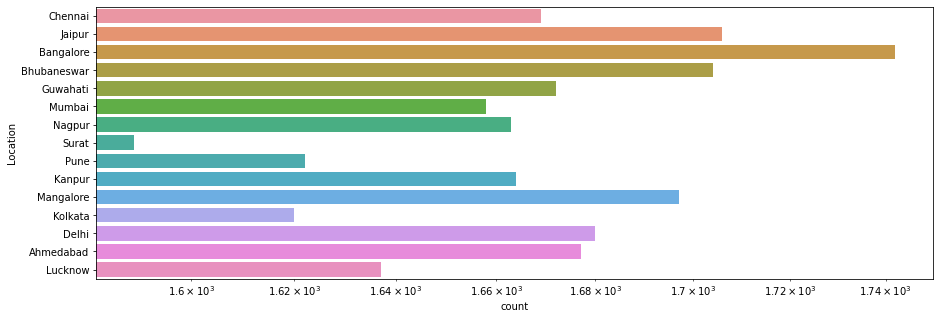

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Location'])
plt.xscale('log')

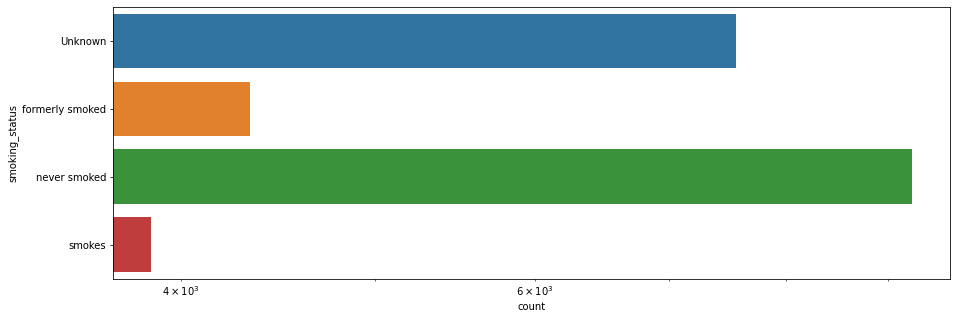

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['smoking_status'])
plt.xscale('log')

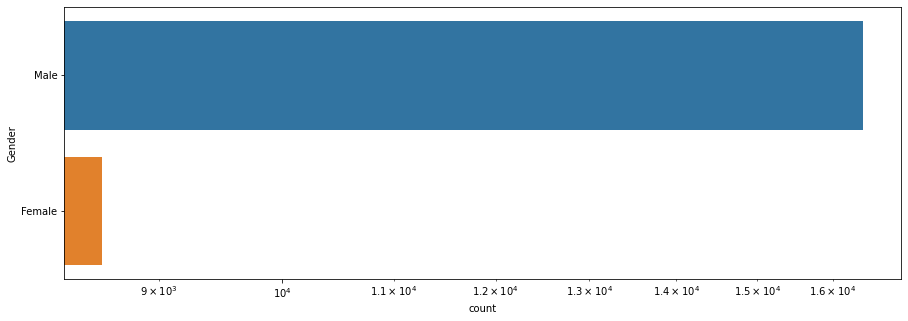

In [83]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Gender'])
plt.xscale('log')

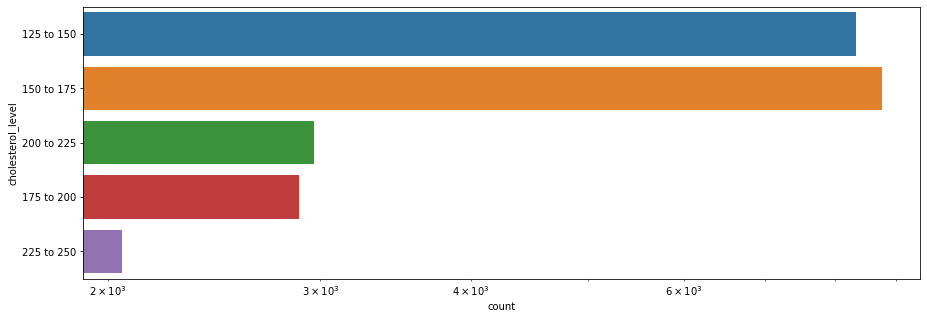

In [84]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['cholesterol_level'])
plt.xscale('log')

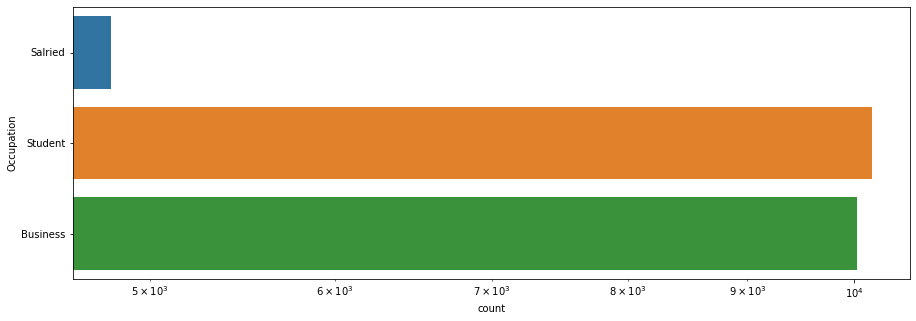

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Occupation'])
plt.xscale('log')

## Correlation Plot

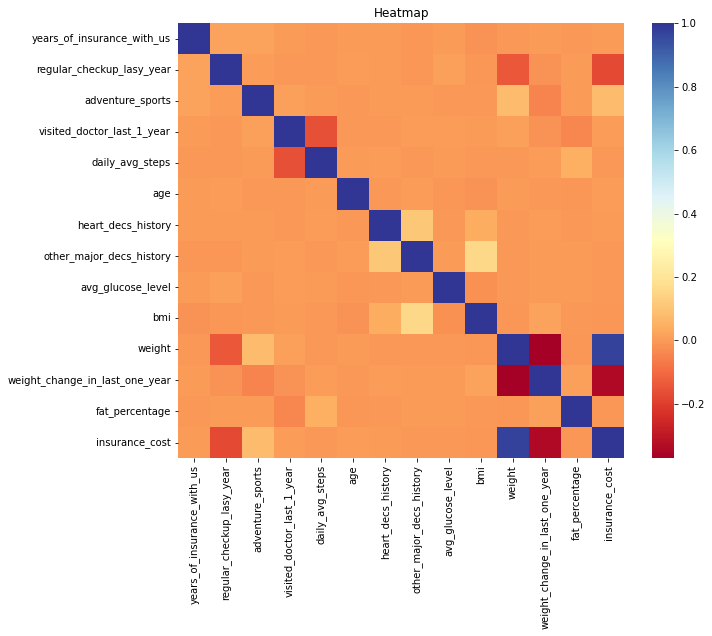

In [33]:
plt.figure(figsize = (10,8))
sns.heatmap(data = df.corr(), cmap = 'RdYlBu')
plt.title('Heatmap')
plt.show()

## Pair Plot

<Figure size 2880x2880 with 0 Axes>

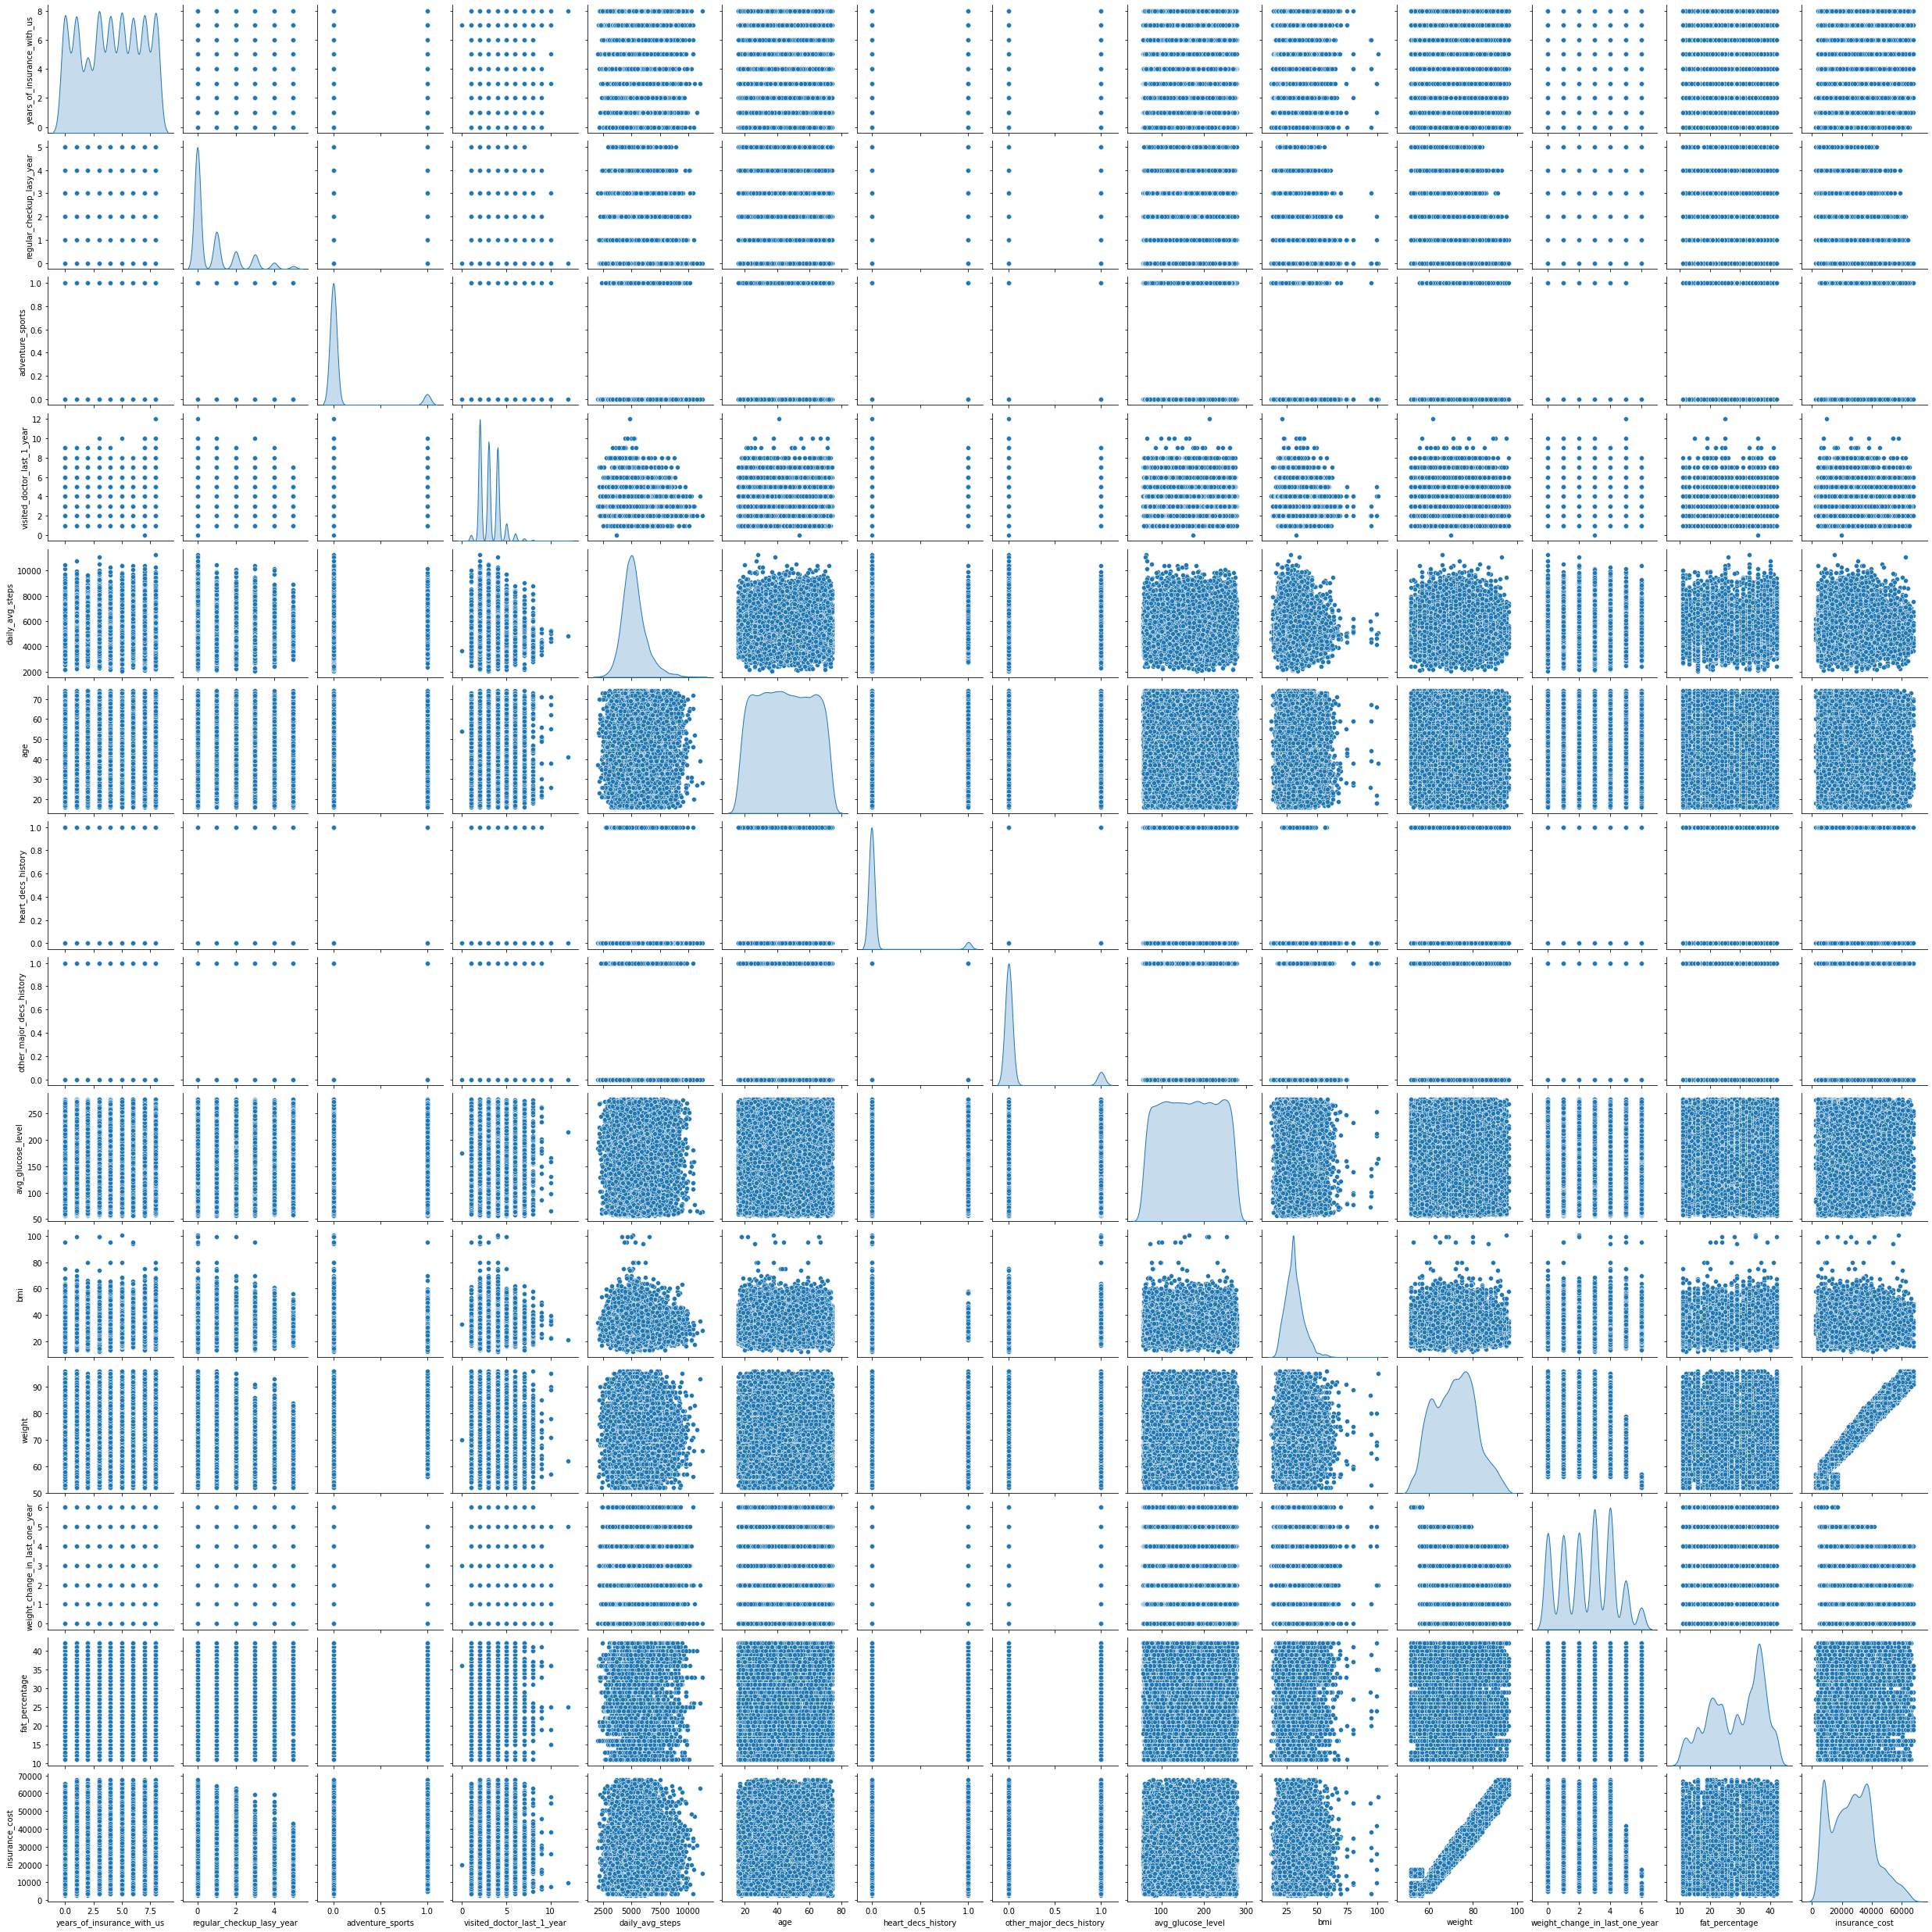

In [34]:
cont=df.dtypes[(df.dtypes!='object')].index
df_attr = (df[cont])
plt.figure(figsize=(40,40))
sns.pairplot(df_attr, diag_kind='kde') 

## Outlier Check

In [35]:
num_cols=df[['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']]

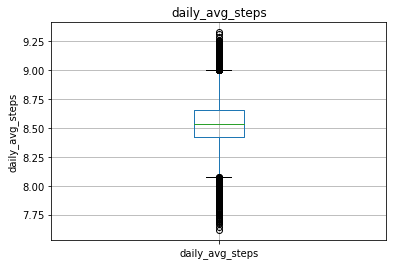

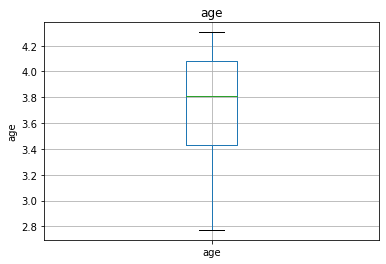

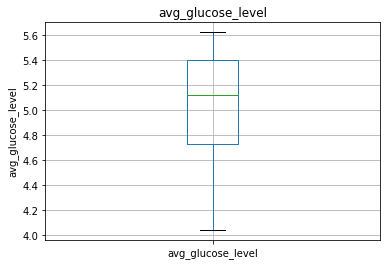

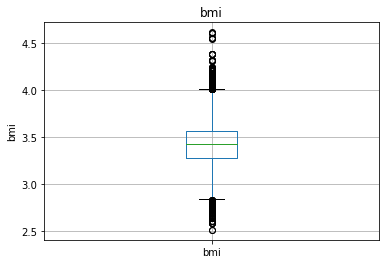

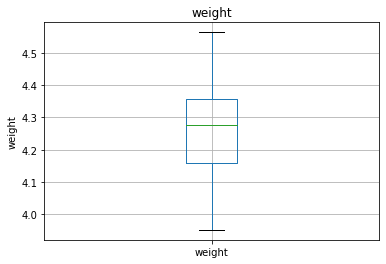

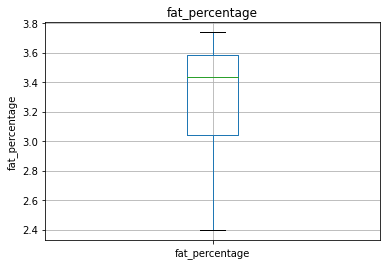

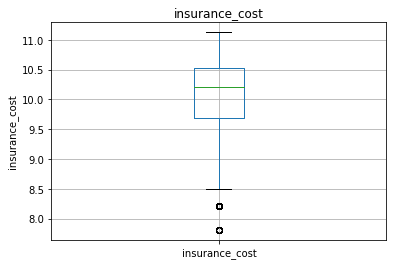

In [36]:
for feature in num_cols:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [38]:
for column in num_cols.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

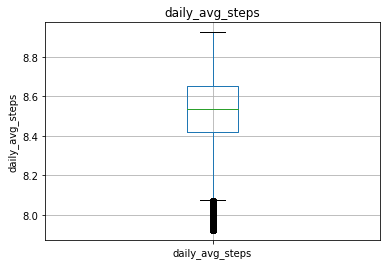

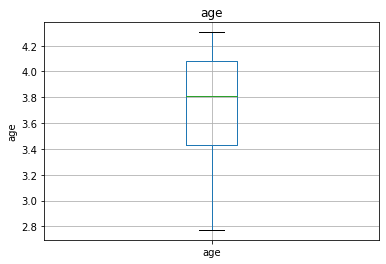

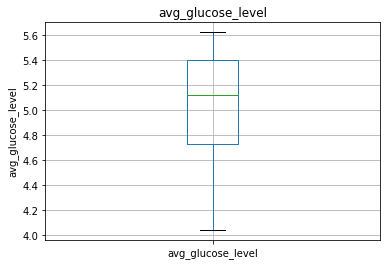

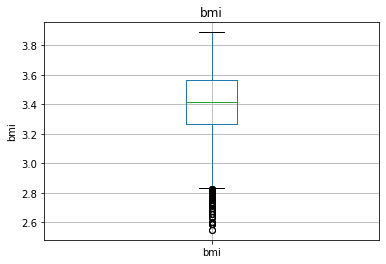

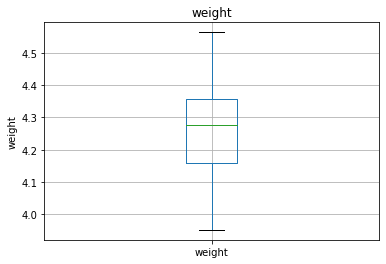

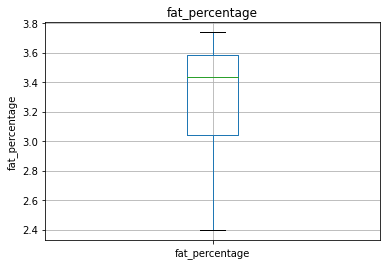

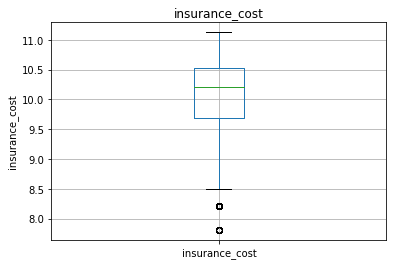

In [39]:
for feature in num_cols:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["daily_avg_steps"]] = scaler.fit_transform(df[["daily_avg_steps"]])
df[["bmi"]] = scaler.fit_transform(df[["bmi"]])
df[["insurance_cost"]] = scaler.fit_transform(df[["insurance_cost"]])

In [43]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   daily_avg_steps    25000 non-null  float64
 1   age                25000 non-null  float64
 2   avg_glucose_level  25000 non-null  float64
 3   bmi                25000 non-null  float64
 4   weight             25000 non-null  float64
 5   fat_percentage     25000 non-null  float64
 6   insurance_cost     25000 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [44]:
num_cols.head()

,daily_avg_steps,age,avg_glucose_level,bmi,weight,fat_percentage,insurance_cost
0,0.443029,28.0,97.0,0.511111,67.0,25.0,0.283019
1,0.768429,50.0,212.0,0.594444,58.0,27.0,0.056604
2,0.367839,68.0,166.0,0.766667,73.0,32.0,0.396226
3,0.726938,51.0,109.0,0.280556,71.0,37.0,0.377358
4,0.458193,44.0,118.0,0.380556,74.0,34.0,0.415094


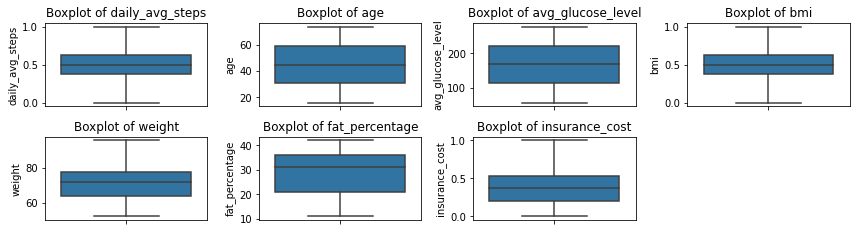

In [46]:
feature_list=num_cols.columns
plt.figure(figsize = (12,8))
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = num_cols[feature_list[i]], data = num_cols)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [245]:
dfcopy=df.copy()

## Encoding

### Label encoding

In [246]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [249]:
df[categorical_features].head()

,Occupation,cholesterol_level,Gender,smoking_status,Year_last_admitted,Location,covered_by_any_other_company,Alcohol,exercise
0,1,0,1,0,14,3,0,2,1
1,2,1,1,1,14,6,0,2,1
2,0,3,0,1,14,6,0,0,0
3,0,2,0,0,14,3,1,2,2
4,2,1,1,2,14,1,0,1,0


### Clustering

### Heirarchial

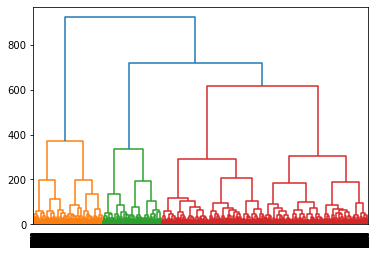

In [257]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(df,method ='ward')
dend = dendrogram(wardlink)

In [258]:
from scipy.cluster.hierarchy import fcluster
cluster = fcluster(wardlink,3,criterion='maxclust')
df['clusters']=cluster
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,Freq
clusters,,,,,,,,,,,,,,,,,,,,,
1,5.548282,0.434248,0.057785,0.997504,3.088501,1.280860,0.014927,-0.006049,0.052793,0.095028,...,21.748128,6.805529,-0.817764,0.375696,1.435976,0.986562,3.221732,0.003132,-0.775052,5209
2,5.472480,0.433749,0.103964,1.022197,3.085844,1.223783,0.010156,0.011596,0.054134,0.093092,...,5.568969,7.955832,1.017947,0.409966,1.431484,1.006569,1.995470,0.003012,1.046382,4415
3,3.197451,0.986277,0.083442,1.004162,3.114789,1.271787,-0.007973,-0.001280,0.055411,0.100676,...,13.704019,6.681517,-0.015251,0.248114,1.446735,0.993952,2.429566,-0.001926,-0.037886,15376


In [321]:
df.drop('clusters',axis=1, inplace=True)

### Separating dependent and independet variables

In [322]:
x=df.drop("insurance_cost",axis=1)
y=df[['insurance_cost']]

### Spliting the data set into train and test

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [325]:
x_train.shape

(17500, 22)

In [326]:
y_train.shape

(17500, 1)

In [327]:
x_test.shape

(7500, 22)

In [328]:
y_test.shape

(7500, 1)

## Model Building

### Linear Regression

In [330]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

### R-Square value on train data

In [331]:
regression_model.score(x_train, y_train)

0.9447425459661952

### R-Square value on test data

In [332]:
regression_model.score(x_test, y_test)

0.9450640128124084

### Prediction on test data

In [333]:
y_pred = regression_model.predict(x_test)

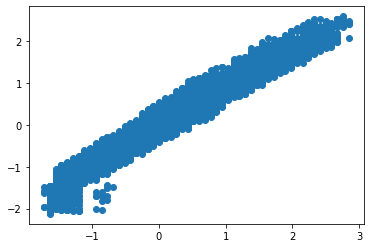

In [334]:
plt.scatter(y_test['insurance_cost'], y_pred)

### MSE Value on test data

In [335]:
MSE=np.square(np.subtract(y_test,y_pred)).mean()
MSE

insurance_cost    0.054111
dtype: float64

### RMSE Value on test data

In [336]:
np.sqrt(MSE)

insurance_cost    0.232617
dtype: float64

In [337]:
data_train=pd.concat([x_train, y_train], axis=1)

In [338]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'insurance_cost ~ Occupation+cholesterol_level+Gender+smoking_status+Year_last_admitted+Location+covered_by_any_other_company+Alcohol+exercise+years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+daily_avg_steps+age+heart_decs_history+other_major_decs_history+avg_glucose_level+bmi+weight+weight_change_in_last_one_year+fat_percentage', data = data_train).fit()
lm1.params

Intercept                         0.010988
Occupation                        0.002747
cholesterol_level                 0.002848
Gender                            0.002551
smoking_status                   -0.000185
Year_last_admitted               -0.003265
Location                          0.000548
covered_by_any_other_company      0.084734
Alcohol                           0.000687
exercise                          0.000087
years_of_insurance_with_us       -0.000879
regular_checkup_lasy_year        -0.032901
adventure_sports                  0.008052
visited_doctor_last_1_year       -0.002545
daily_avg_steps                  -0.001995
age                               0.003055
heart_decs_history                0.006384
other_major_decs_history          0.004376
avg_glucose_level                 0.001603
bmi                              -0.000520
weight                            0.959220
weight_change_in_last_one_year    0.012979
fat_percentage                   -0.000750
dtype: floa

In [339]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.358e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:18:26   Log-Likelihood:                 450.41
No. Observations:               17500   AIC:                            -854.8
Df Residuals:                   17477   BIC:                            -676.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

linear regression equation

Insurance cost = 0.00*occupation+0.00*choleterol level+0.00*gender-0.00*smoking status-0.00*year last admitted+0.00*location+0.08*covered by any other company+0.00*Alcohol+0.00*excercise-0.00*years of insurance with us-0.03*regyular checkup last year+0.00*adventure sports-0.00*visited doctor last 1 year-0.00*daily avg steps+0.00*age+0.00*heart decs history+0.00*other major decs history+0.00*avg glucose level-0.00*bmi+weight*0.95+0.01*weight change inlast one year-0.00*fat percentage

### ANN , Decision Tree Regressor, Random Forest Regressor

In [340]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)

models=[dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                           Train RMSE  Test RMSE  Training Score  Test Score
Decision Tree Regressor  3.111544e-17   0.296986        1.000000    0.910455
Random Forest Regressor  7.969658e-02   0.214129        0.993689    0.953450
ANN Regressor            1.762023e-01   0.257123        0.969151    0.932880


### We will now do the grid search cv to see if we can get better scores

### Grid search CV of Decision Tree model

In [301]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 15}


### Grid search cv of Random forest model

In [306]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


### Grid search cv of ANN model

In [304]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': 500, 'solver': 'sgd'}


### Checking the scores after grid search cv

In [342]:
annr = MLPRegressor(activation='tanh', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=30,random_state=123)
regression_model = LinearRegression()

models=[dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Decision Tree Regressor    0.197853   0.217529        0.961104    0.951960
Random Forest Regressor    0.217861   0.234351        0.952839    0.944242
ANN Regressor              0.226199   0.226050        0.949160    0.948122


### Feature importance

Text(0.5, 0, 'Random Forest Feature Importance')

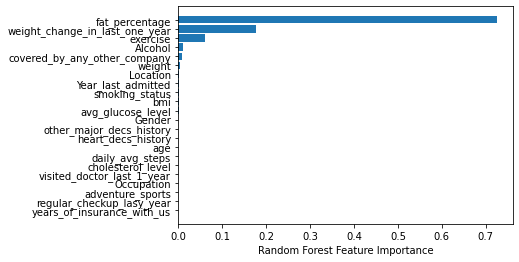

In [343]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(x_train.columns,rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Let us try building models with only important variables

In [345]:
x1=df[['fat_percentage','weight_change_in_last_one_year','exercise','Alcohol','covered_by_any_other_company','weight']]
y1=df[['insurance_cost']]

In [346]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30 , random_state=1)

In [347]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x1_train,y1_train)
        scores_train.append(i.score(x1_train, y1_train))
        scores_test.append(i.score(x1_test, y1_test))
        rmse_train.append(np.sqrt(mean_squared_error(y1_train,i.predict(x1_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y1_test,i.predict(x1_test))))
 
    else :
        i.fit(x1_train,y1_train)
        scores_train.append(i.score(x1_train, y1_train))
        scores_test.append(i.score(x1_test, y1_test))
        rmse_train.append(np.sqrt(mean_squared_error(y1_train,i.predict(x1_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y1_test,i.predict(x1_test))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          0.239296   0.235292        0.943103    0.943794
Decision Tree Regressor    0.098839   0.297851        0.990293    0.909932
Random Forest Regressor    0.122338   0.243845        0.985129    0.939633
ANN Regressor              0.214520   0.218374        0.954275    0.951586


### Grid search cv to check if score is better

In [348]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x1_train,y1_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 15}


In [350]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

grid_search.fit(x1_train,y1_train)

print(grid_search.best_params_)

{'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 300}


In [351]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

grid_search.fit(x1_train,y1_train)

print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'adam'}


### Results after grid search cv

In [352]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='adam',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=7, max_features=6, 
                            min_samples_leaf= 30,
                            min_samples_split= 30, n_estimators= 300,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=30,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x1_train,y1_train)
        scores_train.append(i.score(x1_train, y1_train))
        scores_test.append(i.score(x1_test, y1_test))
        rmse_train.append(np.sqrt(mean_squared_error(y1_train,i.predict(x1_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y1_test,i.predict(x1_test))))
        
    else :
        i.fit(x1_train,y1_train)
        scores_train.append(i.score(x1_train, y1_train))
        scores_test.append(i.score(x1_test, y1_test))
        rmse_train.append(np.sqrt(mean_squared_error(y1_train,i.predict(x1_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y1_test,i.predict(x1_test))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear regression          0.239296   0.235292        0.943103    0.943794
Decision Tree Regressor    0.210464   0.219969        0.955988    0.950876
Random Forest Regressor    0.212880   0.216330        0.954971    0.952488
ANN Regressor              0.214520   0.218374        0.954275    0.951586
